Importamos primero algunas librerías a utilizar

In [ ]:

from sklearn import cluster
from operator import index
from pandas.io.formats.info import DataFrameInfoPrinter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Creo una variable que contiene la matriz
#file_list = []
#matriz = (file_list[0], sep=',')
#Ciclo para generar 
#for i in range(1,len(file_list)):
  #Leo el contenido de cada fichero
    #data = pd.read_csv(file_list[i], sep=',', names=columnas)
    #matriz = pd.concat([matriz, data])

Leemos el archivo que contiene los datos de los genomas y los cargamos en un dataframe

In [ ]:
#Rango para header del dataframe
longitud = range(0,3222)

#Extraemos los datos
datos = pd.read_csv('/content/sims_All_Genomes_13V.txt', sep=',',names=longitud)
#Convertimos a DataFrame
df = pd.DataFrame(datos)
df


,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,1.000000,1.600000e-05,0.000004,0.000018,1.650000e-05,0.000005,0.004489,0.000007,0.438905,0.444450,...,0.447905,0.448444,0.447949,0.447964,0.448927,0.445895,0.453676,0.467578,0.434754,0.448570
1,0.000016,1.000000e+00,0.000012,0.000002,4.020000e-07,0.000011,0.004468,0.000009,0.439023,0.444455,...,0.447910,0.448449,0.447953,0.447968,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574
2,0.000004,1.180000e-05,1.000000,0.000014,1.230000e-05,0.000001,0.004487,0.000003,0.438955,0.444464,...,0.447909,0.448448,0.447953,0.447968,0.448927,0.445901,0.453679,0.467579,0.434764,0.448575
3,0.000018,1.930000e-06,0.000014,1.000000,1.260000e-06,0.000013,0.004466,0.000011,0.439023,0.444456,...,0.447910,0.448449,0.447953,0.447968,0.448931,0.445902,0.453682,0.467579,0.434756,0.448574
4,0.000017,4.020000e-07,0.000012,0.000001,1.000000e+00,0.000012,0.004468,0.000010,0.439023,0.444455,...,0.447909,0.448448,0.447952,0.447967,0.448931,0.445902,0.453681,0.467579,0.434756,0.448574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.445895,4.459020e-01,0.445901,0.445902,4.459020e-01,0.445904,0.446244,0.445903,0.459788,0.451813,...,0.414789,0.415163,0.414791,0.414799,0.408373,1.000000,0.423528,0.406570,0.427833,0.414146
3218,0.453676,4.536810e-01,0.453679,0.453682,4.536810e-01,0.453682,0.454068,0.453682,0.463777,0.457878,...,0.420623,0.421303,0.420574,0.420607,0.425185,0.423528,1.000000,0.425409,0.433879,0.417270
3219,0.467578,4.675790e-01,0.467579,0.467579,4.675790e-01,0.467580,0.468709,0.467580,0.492004,0.482744,...,0.400908,0.402123,0.400933,0.401034,0.408208,0.406570,0.425409,1.000000,0.464967,0.400860
3220,0.434754,4.347560e-01,0.434764,0.434756,4.347560e-01,0.434769,0.435098,0.434767,0.407823,0.408938,...,0.432606,0.433116,0.432599,0.432614,0.430965,0.427833,0.433879,0.464967,1.000000,0.433332


Utilizamos las funciones info() y describe() para obtener información que aporte en nuestro análisis

In [ ]:
#Me permite observar general sobre el dataframe
df.info()
#Para obtener una vista rápida de las principales características estadísticas sobre las variables cuantitativas de la data 
#utilizamos el método describe: conteo, promedio(mean), desviación estandar(std), minimo(min), percentiles (25,50,75), maximo(max)
df.describe()

#Como conclusión podemos comprobar que no existen nulos ni vacíos en ninguna columna 
#porque de otro modo la variable count de la primera fila no resultaría del 100% en todas las columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Columns: 3222 entries, 0 to 3221
dtypes: float64(3222)
memory usage: 79.2 MB


,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
count,3222.000000,3.222000e+03,3222.000000,3222.000000,3.222000e+03,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,0.457448,4.574505e-01,0.457454,0.457450,4.574503e-01,0.457458,0.457946,0.457458,0.453396,0.453922,...,0.446752,0.447321,0.446818,0.446844,0.446462,0.447403,0.454454,0.432313,0.427349,0.445644
std,0.029228,2.922743e-02,0.029226,0.029227,2.922740e-02,0.029225,0.029125,0.029225,0.039521,0.038004,...,0.026366,0.026198,0.026255,0.026246,0.032785,0.016007,0.014690,0.062505,0.053631,0.032862
min,0.000004,4.020000e-07,0.000001,0.000001,4.020000e-07,0.000001,0.004466,0.000001,0.190203,0.000025,...,0.001947,0.001947,0.000186,0.000186,0.056909,0.360687,0.366568,0.244636,0.058722,0.020890
25%,0.447495,4.474957e-01,0.447497,0.447497,4.474965e-01,0.447504,0.447808,0.447504,0.423498,0.428476,...,0.439980,0.440562,0.440062,0.440089,0.443240,0.441013,0.448748,0.378495,0.386280,0.441970
50%,0.461730,4.617275e-01,0.461738,0.461728,4.617265e-01,0.461743,0.462119,0.461743,0.467438,0.463697,...,0.448825,0.449377,0.448880,0.448900,0.449894,0.447947,0.454556,0.453336,0.449020,0.449099
75%,0.470383,4.703885e-01,0.470386,0.470387,4.703865e-01,0.470390,0.470977,0.470389,0.486979,0.483657,...,0.456505,0.456949,0.456568,0.456581,0.456300,0.454960,0.461435,0.489573,0.471404,0.455808
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como se observa en el en dataframe todos los datos se encuentran en una misma escala, sin embargo, en la vida real para poder manipular la información es necesario mantenerla dentro de una escala medible que permita ver la relación que hay entre cada dato y facilitar los procesos que se lleven a cabo más adelante, para ello decidí usar dos métodos para normalizar los valores
El primero método es la normalización Min-Máx y el segundo es mediante el estadístico Z o Estándarización

Normalizamos los valores restando a cada celda el valor minimo que se encuentra en su columna entre la resta del máximo menos el mínimo

In [ ]:
# Normalización mínimo-máximo: zi = (xi – mínimo (x)) / (máximo (x) – mínimo (x))
df_norm=((df-df.min())/df.max()-df.min())
df_norm

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,0.999992,1.519600e-05,0.000002,1.568000e-05,1.569600e-05,0.000003,-0.004443,4.010000e-06,0.058499,0.444399,...,0.444011,0.444550,0.447577,0.447592,0.335109,-0.275479,-0.279460,-0.021694,0.317310,0.406790
1,0.000008,9.999992e-01,0.000010,-5.900000e-07,-4.020000e-07,0.000009,-0.004464,6.280000e-06,0.058617,0.444404,...,0.444016,0.444555,0.447581,0.447596,0.335113,-0.275472,-0.279455,-0.021693,0.317312,0.406794
2,-0.000004,1.099600e-05,0.999998,1.148000e-05,1.149600e-05,-0.000001,-0.004446,-4.000000e-08,0.058549,0.444413,...,0.444015,0.444554,0.447581,0.447596,0.335109,-0.275473,-0.279457,-0.021693,0.317320,0.406795
3,0.000010,1.126000e-06,0.000012,9.999975e-01,4.560000e-07,0.000011,-0.004466,8.360000e-06,0.058617,0.444405,...,0.444016,0.444555,0.447581,0.447596,0.335113,-0.275472,-0.279454,-0.021693,0.317312,0.406794
4,0.000008,-4.020000e-07,0.000010,-1.260000e-06,9.999992e-01,0.000009,-0.004464,6.690000e-06,0.058617,0.444404,...,0.444015,0.444554,0.447580,0.447595,0.335113,-0.275472,-0.279455,-0.021693,0.317312,0.406794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.445887,4.459012e-01,0.445899,4.458995e-01,4.459012e-01,0.445902,0.437312,4.459002e-01,0.079382,0.451762,...,0.410895,0.411269,0.414419,0.414427,0.294555,0.278626,-0.309608,-0.082702,0.310389,0.372366
3218,0.453668,4.536802e-01,0.453677,4.536795e-01,4.536802e-01,0.453680,0.445136,4.536792e-01,0.083371,0.457827,...,0.416729,0.417409,0.420202,0.420235,0.311367,-0.297846,0.266864,-0.063863,0.316435,0.375490
3219,0.467570,4.675782e-01,0.467577,4.675765e-01,4.675782e-01,0.467578,0.459777,4.675772e-01,0.111598,0.482693,...,0.397014,0.398229,0.400561,0.400662,0.294390,-0.314804,-0.307727,0.510728,0.347523,0.359080
3220,0.434746,4.347552e-01,0.434762,4.347535e-01,4.347552e-01,0.434767,0.426166,4.347642e-01,0.027417,0.408887,...,0.428712,0.429222,0.432227,0.432242,0.317147,-0.293541,-0.299257,-0.024305,0.882556,0.391552


Normalizamos los valores restando a cada celda la media que se encuentra en su columna entre la desviación estándar

In [ ]:
#Estándarización : zi = (xi – mean)/std
df_norm2=(df - df.mean())/df.std()
df_norm2

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
0,18.562801,-15.650861,-15.651961,-15.650834,-15.650856,-15.653020,-15.569150,-15.652874,-0.366671,-0.249229,...,0.043743,0.042857,0.043060,0.042692,0.075176,-0.094215,-0.052986,0.564200,0.138069,0.089031
1,-15.650521,18.563022,-15.651694,-15.651391,-15.651407,-15.652815,-15.569855,-15.652797,-0.363686,-0.249098,...,0.043933,0.043048,0.043212,0.042844,0.075298,-0.093777,-0.052646,0.564216,0.138106,0.089152
2,-15.650931,-15.651005,18.563605,-15.650978,-15.651000,-15.653162,-15.569228,-15.653013,-0.365406,-0.248861,...,0.043895,0.043010,0.043212,0.042844,0.075176,-0.093840,-0.052782,0.564216,0.138255,0.089183
3,-15.650446,-15.651343,-15.651619,18.563081,-15.651378,-15.652740,-15.569933,-15.652725,-0.363686,-0.249071,...,0.043933,0.043048,0.043212,0.042844,0.075298,-0.093777,-0.052578,0.564216,0.138106,0.089152
4,-15.650504,-15.651395,-15.651677,-15.651414,18.563055,-15.652802,-15.569871,-15.652783,-0.363686,-0.249098,...,0.043895,0.043010,0.043174,0.042806,0.075298,-0.093777,-0.052646,0.564216,0.138106,0.089152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,-0.395275,-0.395126,-0.395282,-0.395126,-0.395118,-0.395367,-0.401785,-0.395385,0.161729,-0.055485,...,-1.212265,-1.227519,-1.219852,-1.220950,-1.161793,34.522683,-2.105259,-0.411851,0.009020,-0.958507
3218,-0.129057,-0.128972,-0.129152,-0.128937,-0.128963,-0.129222,-0.133154,-0.129207,0.262663,0.104105,...,-0.990996,-0.993147,-0.999591,-0.999655,-0.648997,-1.491560,37.137084,-0.110451,0.121753,-0.863442
3219,0.346584,0.346540,0.346446,0.346543,0.346549,0.346337,0.369535,0.346349,0.976888,0.758409,...,-1.738737,-1.725271,-1.747671,-1.745419,-1.166826,-2.550986,-1.977214,9.082284,0.701420,-1.362806
3220,-0.776452,-0.776480,-0.776342,-0.776481,-0.776472,-0.776382,-0.784476,-0.776432,-1.153136,-1.183664,...,-0.536510,-0.542231,-0.541586,-0.542169,-0.472697,-1.222612,-1.400633,0.522428,10.677649,-0.374668


Después de haber pasado por el proceso de normalización de datos se decidió utilizar la matriz obtenida de la fórmula de Min-Máx ya que la media y la desviación típica resutan ser muy sensibles a valores muy pequeños

Ahora para encontrar el valor óptimo de clusters usando el indicador WCSS y la matriz normalizada

In [ ]:
# -- Obtener el valor de K
num_clusters = range(10,72)

wcss=[] #Es un indicador de que tan de que tan similares son los individuos dentro de cada cluster
for k in num_clusters:
  kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
  kmeans=kmeans.fit(df_norm)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
# Observamos el número de clusters y el score obtenido por cada uno, sin embargo hay que gráficar para poder analizar con mayor facilidad la info
datos_wcss = pd.DataFrame({'Clusters' : num_clusters, 'WCSS' : wcss})
datos_wcss

,Clusters,WCSS
0,10,5018.584239
1,11,4499.011625
2,12,4339.515651
3,13,4227.765007
4,14,4040.693194
...,...,...
57,67,2427.905120
58,68,2427.034306
59,69,2410.948702
60,70,2381.477927


Ahora realizo la gráfica para determinar el número óptimo de cluster mediante el Elbow Method con los datos obtenidos de la matriz anterior

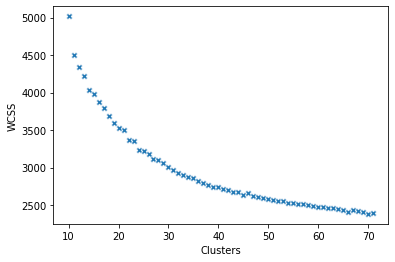

In [ ]:
#Importamos la librería seaborn para poder realizar la gráfica
import seaborn as sns
#Usamos la función scatterpltot y le pasamos los datos del dataframe con el indicador wcss
sns.scatterplot(x='Clusters', y='WCSS', data=datos_wcss, marker='X')


Después de analizar la gráfica podemos observar que existen varios puntos de quiebre para este caso usaremos el 22 como número óptimo de clusters, ademas agregamos una última columna a la matriz para que vaya asignando los labels del cluster al que pertenecen los datos

In [ ]:
#Ejecución del KMeans con 22 clusters usando la matriz normalizada
kmeans = KMeans(n_clusters=22, max_iter=300)
kmeans = kmeans.fit(df_norm)
df_copia = df_norm
#Implementación de los labels
df_copia['Cluster'] = kmeans.labels_


Si imrprimos de nuevo la matriz podemos observar que se ha añadido la nueva columna llamada Cluster y se muestra que fila pertenece a que número del cluster

In [ ]:
#Impresión de la matriz obtenida
df_copia

,0,1,2,3,4,5,6,7,8,9,...,3213,3214,3215,3216,3217,3218,3219,3220,3221,Cluster
0,0.999992,1.519600e-05,0.000002,1.568000e-05,1.569600e-05,0.000003,-0.004443,4.010000e-06,0.058499,0.444399,...,0.444550,0.447577,0.447592,0.335109,-0.275479,-0.279460,-0.021694,0.317310,0.406790,4
1,0.000008,9.999992e-01,0.000010,-5.900000e-07,-4.020000e-07,0.000009,-0.004464,6.280000e-06,0.058617,0.444404,...,0.444555,0.447581,0.447596,0.335113,-0.275472,-0.279455,-0.021693,0.317312,0.406794,4
2,-0.000004,1.099600e-05,0.999998,1.148000e-05,1.149600e-05,-0.000001,-0.004446,-4.000000e-08,0.058549,0.444413,...,0.444554,0.447581,0.447596,0.335109,-0.275473,-0.279457,-0.021693,0.317320,0.406795,4
3,0.000010,1.126000e-06,0.000012,9.999975e-01,4.560000e-07,0.000011,-0.004466,8.360000e-06,0.058617,0.444405,...,0.444555,0.447581,0.447596,0.335113,-0.275472,-0.279454,-0.021693,0.317312,0.406794,4
4,0.000008,-4.020000e-07,0.000010,-1.260000e-06,9.999992e-01,0.000009,-0.004464,6.690000e-06,0.058617,0.444404,...,0.444554,0.447580,0.447595,0.335113,-0.275472,-0.279455,-0.021693,0.317312,0.406794,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.445887,4.459012e-01,0.445899,4.458995e-01,4.459012e-01,0.445902,0.437312,4.459002e-01,0.079382,0.451762,...,0.411269,0.414419,0.414427,0.294555,0.278626,-0.309608,-0.082702,0.310389,0.372366,14
3218,0.453668,4.536802e-01,0.453677,4.536795e-01,4.536802e-01,0.453680,0.445136,4.536792e-01,0.083371,0.457827,...,0.417409,0.420202,0.420235,0.311367,-0.297846,0.266864,-0.063863,0.316435,0.375490,14
3219,0.467570,4.675782e-01,0.467577,4.675765e-01,4.675782e-01,0.467578,0.459777,4.675772e-01,0.111598,0.482693,...,0.398229,0.400561,0.400662,0.294390,-0.314804,-0.307727,0.510728,0.347523,0.359080,9
3220,0.434746,4.347552e-01,0.434762,4.347535e-01,4.347552e-01,0.434767,0.426166,4.347642e-01,0.027417,0.408887,...,0.429222,0.432227,0.432242,0.317147,-0.293541,-0.299257,-0.024305,0.882556,0.391552,16


Cargo el archivo a usar con el nombre de las bacterias y las familias

In [ ]:
grafica = pd.read_csv('/content/groupOrderFamilySlop.txt', sep=',',names=(0,1,2),)
grafica.head()

,0,1,2
0,Actinobacteria,Bifidobacteriales,76
1,Actinobacteria,Micrococcales,92
2,Actinobacteria,Streptomycetales,79
3,Actinobacteria,Micromonosporales,10
4,Actinobacteria,Pseudonocardiales,26


Comenzamos el proceso para la creación de la gráfica Sankey

In [ ]:
# Variables necesarias para crear la Sankey
source = pd.DataFrame(data = np.arange(0,22))
label = pd.DataFrame(data = grafica[1])
value = pd.DataFrame(data = grafica[2])
k_means = pd.DataFrame(data = np.zeros(22))
clusters_reales=pd.DataFrame(data=np.arange(0,3222))

In [ ]:
# Bloque de código para la realización de la gráfica
indice = 0
for i in range(22):
  for n in range(grafica.iat[i,2]):
    clusters_reales.iat[indice,0] = grafica.iat[i,1]
    indice = indice + 1
    contador = 0
for i in range(3222):
  num = clusters_reales.iat[i,0]
  num_ant = clusters_reales.iat[i-1,0]
  if(num != num_ant):
    num_clasif = df_copia.at[i,'Cluster']
    k_means.at[contador] = num_clasif
    contador = contador + 1


In [ ]:
k_means = pd.DataFrame(data=k_means)
for i in range(22):
  k_means.iat[i,0] = k_means.iat[i,0] + 22

In [ ]:
node = dict(label = label[1], pad = 8, thickness=15)
link = dict(source = source[0], target = k_means[0], value = value[2])

In [62]:
import plotly.graph_objects as go
plot = go.Figure(go.Sankey(
    node=node, 
    link=link))

plot.update_layout(height = 1300, 
                   width = 1300,
                   font = dict(size=15,color='black'), 
                   title = 'Gráfica de bacterias', 
                   font_size=12, 
                   paper_bgcolor='#fcfff0')
plot.show()